# Logistic Regression

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
c = pd.read_csv('Companydata.csv')
c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#To find whether there are any existing null values or not
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
#Count of duplicated rows
c[c.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:>

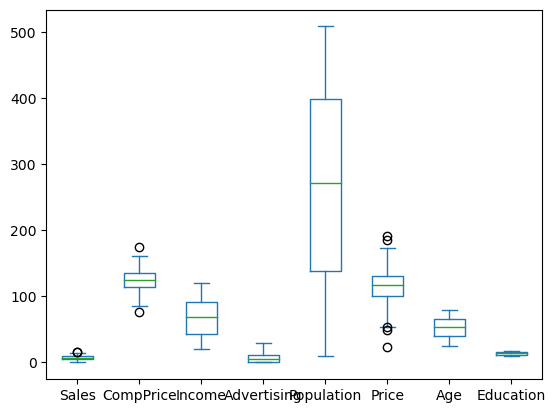

In [5]:
#Outlier Detection
c.plot(kind='box')

<AxesSubplot:>

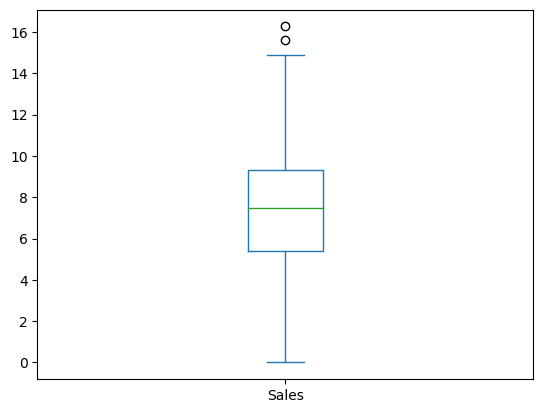

In [6]:
c.Sales.plot(kind='box')

In [7]:
c.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [8]:
IQR = 9.320000 - 5.390000
IQR

3.9300000000000006

In [9]:
#Calculation of upper fence
upper_fence = 9.320000 + (1.5*IQR)
upper_fence

15.215000000000002

In [10]:
index=c[c.Sales>15.215000000000002].index
c = c.drop(index,axis=0)

<AxesSubplot:>

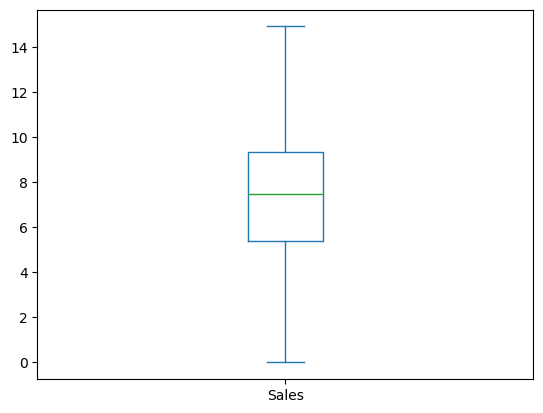

In [11]:
c.Sales.plot(kind='box')

<AxesSubplot:>

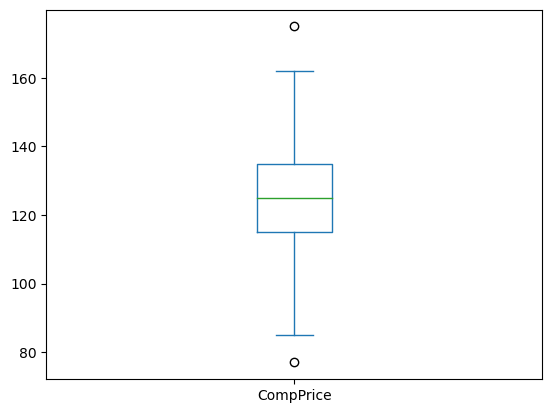

In [12]:
c.CompPrice.plot(kind='box')

In [13]:
c.CompPrice.describe()

count    398.000000
mean     124.942211
std       15.351275
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [14]:
IQR = 135.000000 - 115.000000
IQR

20.0

In [15]:
#Calculation of upper fence
upper_fence = 135.000000 + (1.5*IQR)
upper_fence

165.0

In [16]:
#Calculation of lower fence
lower_fence = 115.000000 - (1.5*IQR)
lower_fence

85.0

In [18]:
index=c[c.CompPrice>165.0].index
c = c.drop(index,axis=0)

In [19]:
index=c[c.CompPrice<85.0].index
c = c.drop(index,axis=0)

<AxesSubplot:>

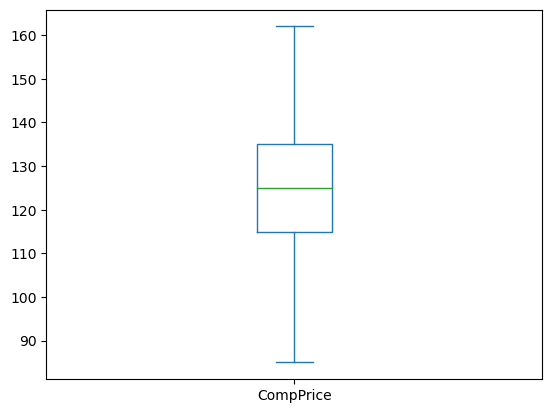

In [20]:
c.CompPrice.plot(kind='box')

<AxesSubplot:>

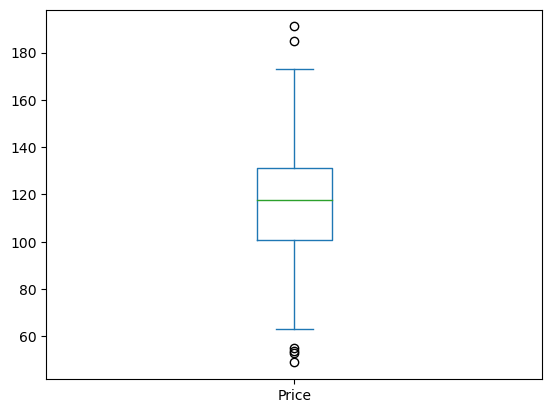

In [21]:
c.Price.plot(kind='box')

In [22]:
c.Price.describe()

count    396.000000
mean     116.070707
std       23.069077
min       49.000000
25%      100.750000
50%      117.500000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [23]:
IQR = 131.000000 - 100.750000
IQR

30.25

In [24]:
#Calculation of upper fence
upper_fence = 131.000000 + (1.5*IQR)
upper_fence

176.375

In [25]:
#Calculation of lower fence
lower_fence = 100.750000 - (1.5*IQR)
lower_fence

55.375

In [26]:
index=c[c.Price>176.375].index
c = c.drop(index,axis=0)

In [27]:
index=c[c.Price<55.375].index
c = c.drop(index,axis=0)

<AxesSubplot:>

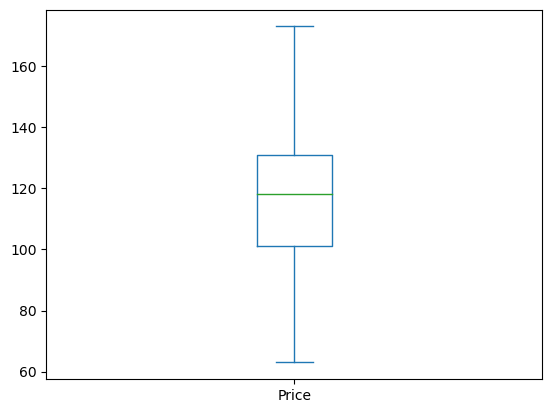

In [28]:
c.Price.plot(kind='box')

/home/suji/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

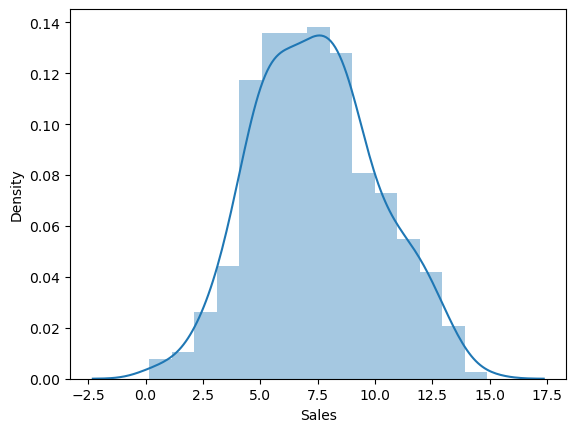

In [29]:
#To check whether the distribution is normal
sns.distplot(c['Sales'])

/home/suji/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CompPrice', ylabel='Density'>

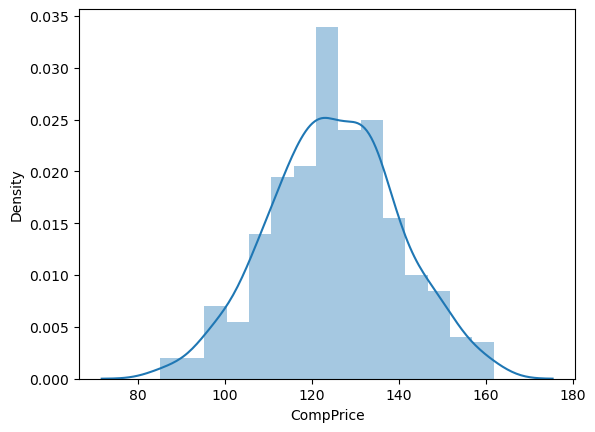

In [30]:
sns.distplot(c['CompPrice'])

/home/suji/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

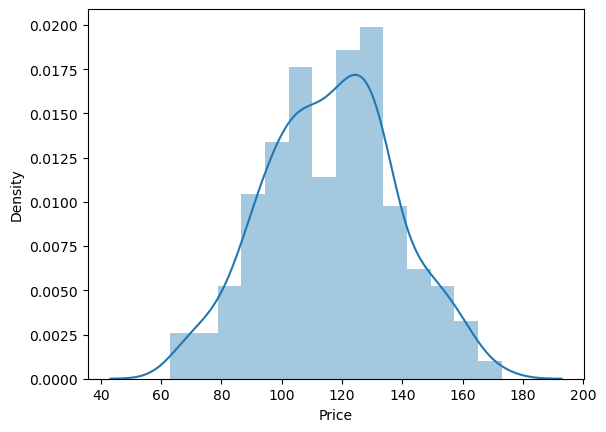

In [31]:
sns.distplot(c['Price'])

In [32]:
c.loc[c['Sales'] < 6, 'Target'] = 'Low'
c.loc[c['Sales'] >= 6, 'Target'] = 'High'
c.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,High
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,High
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High
8,6.54,132,110,0,108,124,Medium,76,10,No,No,High
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low


In [33]:
#Converting the categorical data to Binary data
c['Urban'] = c['Urban'].astype('category').cat.codes
c['US'] = c['US'].astype('category').cat.codes
c['ShelveLoc'] = c['ShelveLoc'].astype('category').cat.codes
c['Target'] = c['Target'].astype('category').cat.codes
c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [238]:
array = c.values
X = array[:,0:10]
Y = array[:,11]
seed = 7

In [239]:
X

array([[  9.5 , 138.  ,  73.  , ...,  42.  ,  17.  ,   1.  ],
       [ 11.22, 111.  ,  48.  , ...,  65.  ,  10.  ,   1.  ],
       [ 10.06, 113.  ,  35.  , ...,  59.  ,  12.  ,   1.  ],
       ...,
       [  7.41, 162.  ,  26.  , ...,  40.  ,  18.  ,   1.  ],
       [  5.94, 100.  ,  79.  , ...,  50.  ,  12.  ,   1.  ],
       [  9.71, 134.  ,  37.  , ...,  49.  ,  16.  ,   1.  ]])

In [240]:
Y

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1.

# Train & Test Data Split

In [241]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [242]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((312, 10), (312,), (78, 10), (78,))

# Building Logistic Regression Model & Monitoring Run Time

In [244]:
%%time
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

CPU times: user 10.2 ms, sys: 7.02 ms, total: 17.2 ms
Wall time: 19.1 ms


/home/suji/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction for Train dataset using the model

In [245]:
#Predict for Train dataset
y_pred_train = classifier.predict(X_train)
y_pred_proba_train = classifier.predict_proba(X_train)
y_pred_proba_train

array([[1.47312459e-01, 8.52687541e-01],
       [8.99475271e-01, 1.00524729e-01],
       [7.05023218e-01, 2.94976782e-01],
       [7.40554271e-02, 9.25944573e-01],
       [9.98957458e-01, 1.04254179e-03],
       [9.99116716e-01, 8.83283628e-04],
       [9.99933169e-01, 6.68313228e-05],
       [4.56773214e-02, 9.54322679e-01],
       [1.79193971e-02, 9.82080603e-01],
       [9.99266140e-01, 7.33860128e-04],
       [9.99998931e-01, 1.06905210e-06],
       [9.99922228e-01, 7.77715279e-05],
       [3.85355328e-02, 9.61464467e-01],
       [8.77765192e-01, 1.22234808e-01],
       [9.99999029e-01, 9.70501085e-07],
       [7.28888658e-04, 9.99271111e-01],
       [9.99791172e-01, 2.08827545e-04],
       [9.99626094e-01, 3.73906118e-04],
       [9.99995220e-01, 4.77966138e-06],
       [3.72572090e-02, 9.62742791e-01],
       [9.96700650e-01, 3.29934978e-03],
       [9.99946916e-01, 5.30836645e-05],
       [9.88648535e-01, 1.13514654e-02],
       [7.69554665e-04, 9.99230445e-01],
       [7.302493

In [246]:
y_pred_train_df= pd.DataFrame({'actual': y_train,'predicted':y_pred_train,'prob[0]':y_pred_proba_train[:,0],'prob[1]':y_pred_proba_train[:,1]})
y_pred_train_df

,actual,predicted,prob[0],prob[1]
0,1.0,1.0,0.147312,0.852688
1,0.0,0.0,0.899475,0.100525
2,0.0,0.0,0.705023,0.294977
3,1.0,1.0,0.074055,0.925945
4,0.0,0.0,0.998957,0.001043
...,...,...,...,...
307,0.0,0.0,0.641022,0.358978
308,0.0,0.0,0.999418,0.000582
309,0.0,0.0,0.997244,0.002756
310,1.0,1.0,0.071440,0.928560


In [247]:
pd.crosstab(y_pred_train_df.actual,y_pred_train_df.predicted)

predicted,0.0,1.0
actual,,
0.0,201,8
1.0,9,94


# Accuracy (Train dataset) using Logistic Regression Model

In [265]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_train_df.actual,y_pred_train_df.predicted)
accuracy = accuracy_score(y_pred_train_df.actual,y_pred_train_df.predicted)*100
print("Confusion matrix:\n",cm)
print("Accuracy: {:.2f}%".format(accuracy))

Confusion matrix:
 [[201   8]
 [  9  94]]
Accuracy: 94.55%


# Prediction for Test dataset using the model

In [249]:
#Predict for Test dataset
y_pred_test = classifier.predict(X_test)
y_pred_proba_test = classifier.predict_proba(X_test)
y_pred_proba_test

array([[4.04341992e-01, 5.95658008e-01],
       [9.99999993e-01, 7.27493835e-09],
       [9.99988524e-01, 1.14760692e-05],
       [9.99868957e-01, 1.31043031e-04],
       [3.12133462e-01, 6.87866538e-01],
       [9.99858252e-01, 1.41748406e-04],
       [9.99999996e-01, 4.17531683e-09],
       [9.99365872e-01, 6.34127832e-04],
       [9.99999977e-01, 2.30841845e-08],
       [4.01516658e-01, 5.98483342e-01],
       [8.99594046e-01, 1.00405954e-01],
       [1.18439226e-02, 9.88156077e-01],
       [9.99807154e-01, 1.92846481e-04],
       [1.28525376e-01, 8.71474624e-01],
       [1.32173034e-01, 8.67826966e-01],
       [3.77272729e-01, 6.22727271e-01],
       [2.15154958e-02, 9.78484504e-01],
       [9.99460188e-01, 5.39811841e-04],
       [9.97004749e-01, 2.99525124e-03],
       [8.28830970e-03, 9.91711690e-01],
       [9.71098393e-01, 2.89016071e-02],
       [5.26334193e-03, 9.94736658e-01],
       [9.99996790e-01, 3.20965696e-06],
       [9.99980907e-01, 1.90925281e-05],
       [5.732433

In [250]:
y_pred_test_df= pd.DataFrame({'actual': y_test,'predicted':y_pred_test,'prob[0]':y_pred_proba_test[:,0],'prob[1]':y_pred_proba_test[:,1]})
y_pred_test_df

,actual,predicted,prob[0],prob[1]
0,0.0,1.0,0.404342,5.956580e-01
1,0.0,0.0,1.000000,7.274938e-09
2,0.0,0.0,0.999989,1.147607e-05
3,0.0,0.0,0.999869,1.310430e-04
4,1.0,1.0,0.312133,6.878665e-01
...,...,...,...,...
73,0.0,0.0,0.997057,2.943401e-03
74,1.0,1.0,0.000025,9.999752e-01
75,0.0,0.0,0.996429,3.570705e-03
76,1.0,1.0,0.003919,9.960812e-01


In [251]:
pd.crosstab(y_pred_train_df.actual,y_pred_train_df.predicted)

predicted,0.0,1.0
actual,,
0.0,201,8
1.0,9,94


In [252]:
y_pred_test_df= pd.DataFrame({'actual': y_test,'predicted':y_pred_test,'prob[0]':y_pred_proba_test[:,0],'prob[1]':y_pred_proba_test[:,1]})
y_pred_test_df

,actual,predicted,prob[0],prob[1]
0,0.0,1.0,0.404342,5.956580e-01
1,0.0,0.0,1.000000,7.274938e-09
2,0.0,0.0,0.999989,1.147607e-05
3,0.0,0.0,0.999869,1.310430e-04
4,1.0,1.0,0.312133,6.878665e-01
...,...,...,...,...
73,0.0,0.0,0.997057,2.943401e-03
74,1.0,1.0,0.000025,9.999752e-01
75,0.0,0.0,0.996429,3.570705e-03
76,1.0,1.0,0.003919,9.960812e-01


In [253]:
pd.crosstab(y_pred_test_df.actual,y_pred_test_df.predicted)

predicted,0.0,1.0
actual,,
0.0,50,3
1.0,3,22


# Accuracy (Test dataset) using Logistic Regression Model

In [264]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_pred_test_df.actual,y_pred_test_df.predicted)
accuracy = accuracy_score(y_pred_test_df.actual,y_pred_test_df.predicted)*100
print("Confusion matrix:\n",cm)
print("Accuracy: {:.2f}%".format(accuracy))

Confusion matrix:
 [[50  3]
 [ 3 22]]
Accuracy: 92.31%
